# NEXT:
- check unmatched
    - check the type (journal, abstract etc)
- check dubous titles
- get keyfile
- add to bib file
    - add ss_id's to bibfile
    - add ss_doi

## Flowchart
1. match on doi
    - single match = match
    - multiple matches, one with most citations = match
        - NOTE: arxiv could be updated with doi, so citations may originate from the arxiv paper. Check what to do?
2. match on title
    - ss_id has single bibkey match > 80%?
        - Check if multiple ss_ids are linked to this single bibkey
        - Could be that one of these ss_ids are already linked via doi?
    - ss_id has multiple bibkey matches > 80% 
        - check indivually
        - probably arxiv + journal
        - take one with most citations?
        - sum citations?

### Main task: make csv file with ambiguous cases that can be checked manually
should contain:
- ss_id
- bibkey
- Titles

# Q: why no matches?

In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
df_bib = pd.read_csv('script_data/temp_diag_bib_summary.csv')
df_ss = pd.read_csv('script_data/temp_semantic_scholar_all_staff_id_last_500_summary.csv')
df_doi = pd.read_csv('script_data/temp_doi_match_data.csv')
df_title = pd.read_csv('script_data/temp_title_match_data.csv')

In [3]:
# df_non_string = df_bib[df_bib['type']!='string']
# not_na_doi = df_non_string[df_non_string['type']!='article'][df_non_string[df_non_string['type']!='article']['doi'].notna()]
# from collections import Counter
# counts = Counter(not_na_doi['type'])

In [4]:
# df_ss[df_ss['ss_id'] == 'c70d5169b5c69171cc2ed3ec40eebda0630988d9']

# Matches df
This is the df we want to make complete

In [5]:
df_matches = df_bib[df_bib['type']!='string'][['bibkey']]
df_matches['ss_id'] = len(df_matches)*[np.nan]
df_matches['all_ss_ids'] = len(df_matches)*[np.nan]
df_matches['comment'] = len(df_matches)*[np.nan]
df_matches

,bibkey,ss_id,all_ss_ids,comment
1069,Abas05,NaN,NaN,NaN
1070,Genu22,NaN,NaN,NaN
1071,Abas05a,NaN,NaN,NaN
1072,Abel19,NaN,NaN,NaN
1073,Abra08a,NaN,NaN,NaN
...,...,...,...,...
2808,Jark22,NaN,NaN,NaN
2809,Vend23,NaN,NaN,NaN
2810,Pate23,NaN,NaN,NaN
2811,Loma23a,NaN,NaN,NaN


# BIB SUMMARY

In [6]:
df_bib

,bibkey,type,title,authors,doi,gs_citations,journal
0,AA,string,NaN,NaN,NaN,NaN,NaN
1,AAC,string,NaN,NaN,NaN,NaN,NaN
2,AACC,string,NaN,NaN,NaN,NaN,NaN
3,AAPM,string,NaN,NaN,NaN,NaN,NaN
4,AATC,string,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2808,Jark22,article,Generalization of Deep Learning in Digital Pat...,"Jarkman, Sofia and Karlberg, Micael and Pocevi...",10.3390/cancers14215424,NaN,CANCERS
2809,Vend23,inproceedings,Automatic quantification of {TSR} as a prognos...,"Vendittelli, Pierpaolo and Bokhorst, John-Mell...",NaN,NaN,NaN
2810,Pate23,phdthesis,Automated Image Analysis of Cranial Non-Contra...,Ajay Patel,NaN,NaN,PhD thesis
2811,Loma23a,conference,Deep learning for multi-class cell detection i...,Robin Lomans and Jeroen van der Laak and Iris ...,NaN,NaN,NaN


In [7]:
df_bib[df_bib['type']!='string']

,bibkey,type,title,authors,doi,gs_citations,journal
1069,Abas05,article,Analysis of regularity in the {EEG} background...,D. Ab\'{a}solo and R. Hornero and P. Espino an...,10.1016/j.clinph.2005.04.001,233.0,CLINNP
1070,Genu22,conference,Imaging tumor-infiltrating CD8 (+) T-cells in ...,E. A. J. van Genugten and B. Piet and G. Schre...,NaN,NaN,NaN
1071,Abas05a,inproceedings,EEG} background activity analysis in {A}lzheim...,D. Ab\'{a}solo and C. G\'{o}mez and J. Poza an...,NaN,3.0,NaN
1072,Abel19,article,"Computational pathology definitions, best prac...","Abels, Esther and Pantanowitz, Liron and Aeffn...",10.1002/path.5331,24.0,JPAT
1073,Abra08a,article,Evaluation of a system for automatic detection...,M. D. Abr\`amoff and M. Niemeijer and M. S. A....,10.2337/dc07-1312,287.0,DC
...,...,...,...,...,...,...,...
2808,Jark22,article,Generalization of Deep Learning in Digital Pat...,"Jarkman, Sofia and Karlberg, Micael and Pocevi...",10.3390/cancers14215424,NaN,CANCERS
2809,Vend23,inproceedings,Automatic quantification of {TSR} as a prognos...,"Vendittelli, Pierpaolo and Bokhorst, John-Mell...",NaN,NaN,NaN
2810,Pate23,phdthesis,Automated Image Analysis of Cranial Non-Contra...,Ajay Patel,NaN,NaN,PhD thesis
2811,Loma23a,conference,Deep learning for multi-class cell detection i...,Robin Lomans and Jeroen van der Laak and Iris ...,NaN,NaN,NaN


In [8]:
df_bib[df_bib['title'].notna()]

,bibkey,type,title,authors,doi,gs_citations,journal
1069,Abas05,article,Analysis of regularity in the {EEG} background...,D. Ab\'{a}solo and R. Hornero and P. Espino an...,10.1016/j.clinph.2005.04.001,233.0,CLINNP
1070,Genu22,conference,Imaging tumor-infiltrating CD8 (+) T-cells in ...,E. A. J. van Genugten and B. Piet and G. Schre...,NaN,NaN,NaN
1071,Abas05a,inproceedings,EEG} background activity analysis in {A}lzheim...,D. Ab\'{a}solo and C. G\'{o}mez and J. Poza an...,NaN,3.0,NaN
1072,Abel19,article,"Computational pathology definitions, best prac...","Abels, Esther and Pantanowitz, Liron and Aeffn...",10.1002/path.5331,24.0,JPAT
1073,Abra08a,article,Evaluation of a system for automatic detection...,M. D. Abr\`amoff and M. Niemeijer and M. S. A....,10.2337/dc07-1312,287.0,DC
...,...,...,...,...,...,...,...
2808,Jark22,article,Generalization of Deep Learning in Digital Pat...,"Jarkman, Sofia and Karlberg, Micael and Pocevi...",10.3390/cancers14215424,NaN,CANCERS
2809,Vend23,inproceedings,Automatic quantification of {TSR} as a prognos...,"Vendittelli, Pierpaolo and Bokhorst, John-Mell...",NaN,NaN,NaN
2810,Pate23,phdthesis,Automated Image Analysis of Cranial Non-Contra...,Ajay Patel,NaN,NaN,PhD thesis
2811,Loma23a,conference,Deep learning for multi-class cell detection i...,Robin Lomans and Jeroen van der Laak and Iris ...,NaN,NaN,NaN


# SEMANTIC SCHOLAR SUMMARY

In [9]:
df_ss

,staff_id,staff_name,staff_from,staff_till,ss_year,ss_id,title,doi,ss_citations
0,123637526,Bram van Ginneken,1996,9999,2016,0023c0af3833ba26698ff22e236f3625f1533e86,Quantitative Dose Dependency Analysis of Whole...,10.1148/radiol.2015142230,23
1,2657081,Rashindra Manniesing,2010,2021,2016,0023c0af3833ba26698ff22e236f3625f1533e86,Quantitative Dose Dependency Analysis of Whole...,10.1148/radiol.2015142230,23
2,8038506,Bram van Ginneken,1996,9999,2003,00559146cc1276c6c98401e2aa35e591ebccca76,Model-based segmentation of abdominal aortic a...,10.1117/12.481367,28
3,2895994,Colin Jacobs,2010,9999,2020,0060644239845c59813a5a9122d34e1f75d18e4c,Association between the number and size of int...,10.7717/peerj.9166,0
4,1419819133,Cornelia Schaefer-Prokop,2010,9999,2020,0060644239845c59813a5a9122d34e1f75d18e4c,Association between the number and size of int...,10.7717/peerj.9166,0
...,...,...,...,...,...,...,...,...,...
2169,2109170880,Ajay Patel,2015,9999,2020,ffa6b97fd94b3641ddf22af707719a42ee4db9ac,Cerebral Artery and Vein Segmentation in Four-...,10.1148/ryai.2020190178,7
2170,2657081,Rashindra Manniesing,2010,2021,2020,ffa6b97fd94b3641ddf22af707719a42ee4db9ac,Cerebral Artery and Vein Segmentation in Four-...,10.1148/ryai.2020190178,7
2171,145388932,Jeroen van der Laak,1991,9999,2018,ffab09ba8100420dbd066f31c830f7d3e984696b,Stain-Transforming Cycle-Consistent Generative...,NaN,65
2172,145959882,Geert Litjens,2016,9999,2018,ffab09ba8100420dbd066f31c830f7d3e984696b,Stain-Transforming Cycle-Consistent Generative...,NaN,65


# DOI matches

In [10]:
pd.isna(df_doi.iloc[318]['comment'])

False

In [11]:
print(len(df_doi))
df_doi

843


,bibkey,ss_id,all_ss_ids,comment
0,Adri11,691c90e68eab1dcae5861fba0eab73ba626e6777,NaN,single doi match
1,Adri11b,c738da78dc1fb336a8dff5a8047059d52a6de939,NaN,single doi match
2,Adri11c,9fabf1bc1c126702a051ec56474af2d1518ad0ba,NaN,single doi match
3,Altu20,90a870cbb9897124193ba18c5358fe45b6260621,NaN,single doi match
4,Alves22a,3a84e2a533df9a1351f7442735c961bc80b5892e,NaN,single doi match
...,...,...,...,...
838,Laar23,97c5ca5dd59f564c88a0f36e74a4f55c1ae66b79,NaN,single doi match
839,Scho23,69cec4aa46e33d973af972f7b78e5991d8f03601,NaN,single doi match
840,Eeke23,fc5eb96c03e65d357cb8425a5938f4a6b62be9bd,NaN,single doi match
841,Linm23,697be6a6398755ff665b968936fef868ec8974bf,NaN,single doi match


In [12]:
df_doi[df_doi['comment'].notna()]['comment'][0]

'single doi match'

In [13]:
df_doi[df_doi['comment'].notna()]['comment'][1]

'single doi match'

## Example

In [14]:
bibkey = 'Altu20'
ss_id = df_doi[df_doi['bibkey']==bibkey]['ss_id'].item()
display(df_doi[df_doi['bibkey']==bibkey])
display(df_ss[df_ss['ss_id']==ss_id])
display(df_bib[df_bib['bibkey']==bibkey])

,bibkey,ss_id,all_ss_ids,comment
3,Altu20,90a870cbb9897124193ba18c5358fe45b6260621,NaN,single doi match


,staff_id,staff_name,staff_from,staff_till,ss_year,ss_id,title,doi,ss_citations
1275,123637526,Bram van Ginneken,1996,9999,2020,90a870cbb9897124193ba18c5358fe45b6260621,Feasibility of end-to-end trainable two-stage ...,10.1117/12.2551331,3
1276,2895994,Colin Jacobs,2010,9999,2020,90a870cbb9897124193ba18c5358fe45b6260621,Feasibility of end-to-end trainable two-stage ...,10.1117/12.2551331,3


,bibkey,type,title,authors,doi,gs_citations,journal
1084,Altu20,inproceedings,Feasibility of End-To-End Trainable Two-Stage ...,"Altun, Hidir Cem and Chlebus, Grzegorz and Jac...",10.1117/12.2551331,NaN,NaN


In [15]:
bibkey = 'Amga20'
ss_id = df_doi[df_doi['bibkey']==bibkey]['ss_id'].item()
display(df_doi[df_doi['bibkey']==bibkey])
display(df_ss[df_ss['ss_id']==ss_id])
display(df_bib[df_bib['bibkey']==bibkey])

,bibkey,ss_id,all_ss_ids,comment
5,Amga20,b4c4c3dc91d42114023b0575c3e2273b87446ff7,"['69999230b02054b82254684a73bb8a4c83878d28', '...",multiple doi matches ['69999230b02054b82254684...


,staff_id,staff_name,staff_from,staff_till,ss_year,ss_id,title,doi,ss_citations
1573,145441238,Jeroen van der Laak,1991,9999,2020,b4c4c3dc91d42114023b0575c3e2273b87446ff7,Report on computational assessment of Tumor In...,10.1038/s41523-020-0154-2,57
1574,143613202,Francesco Ciompi,2013,9999,2020,b4c4c3dc91d42114023b0575c3e2273b87446ff7,Report on computational assessment of Tumor In...,10.1038/s41523-020-0154-2,57


,bibkey,type,title,authors,doi,gs_citations,journal
1088,Amga20,article,Report on computational assessment of Tumor In...,Mohamed Amgad and and Elisabeth Specht Stovgaa...,10.1038/s41523-020-0154-2,2.0,npj Breast Cancer


In [16]:
df_doi[df_doi['bibkey']==bibkey]['comment'].item()

"multiple doi matches ['69999230b02054b82254684a73bb8a4c83878d28', 'b4c4c3dc91d42114023b0575c3e2273b87446ff7'], took the first one with most citations"

In [17]:
ss_id = '69999230b02054b82254684a73bb8a4c83878d28'
display(df_doi[df_doi['bibkey']==bibkey])
display(df_ss[df_ss['ss_id']==ss_id])
display(df_bib[df_bib['bibkey']==bibkey])

,bibkey,ss_id,all_ss_ids,comment
5,Amga20,b4c4c3dc91d42114023b0575c3e2273b87446ff7,"['69999230b02054b82254684a73bb8a4c83878d28', '...",multiple doi matches ['69999230b02054b82254684...


,staff_id,staff_name,staff_from,staff_till,ss_year,ss_id,title,doi,ss_citations
956,143613202,Francesco Ciompi,2013,9999,2020,69999230b02054b82254684a73bb8a4c83878d28,Report on computational assessment of Tumor In...,10.1038/s41523-020-0154-2,26
957,145441238,Jeroen van der Laak,1991,9999,2020,69999230b02054b82254684a73bb8a4c83878d28,Report on computational assessment of Tumor In...,10.1038/s41523-020-0154-2,26


,bibkey,type,title,authors,doi,gs_citations,journal
1088,Amga20,article,Report on computational assessment of Tumor In...,Mohamed Amgad and and Elisabeth Specht Stovgaa...,10.1038/s41523-020-0154-2,2.0,npj Breast Cancer


# FILL DF_MATCHES WITH DOI MATCHES

In [18]:
df_doi['comment'][df_doi['comment']!='single doi match']

5      multiple doi matches ['69999230b02054b82254684...
6      multiple doi matches ['979a9f247700d00ff2c3f06...
26     multiple doi matches ['91bcebba717670d740ef760...
88     multiple doi matches ['b0cc9473a96dcd45dd1c7de...
89     multiple doi matches ['39a52867ea3d60ec4f28182...
100    multiple doi matches ['3ed451d2830a2afcbbd254f...
102    multiple doi matches ['27cebb08aca785444166209...
178    multiple doi matches ['2d7797e69a35b5ffe021a27...
186    multiple doi matches ['91feb0cb04d67a5c38d0a4e...
238    multiple doi matches ['13122b7c0ef4a596875eff9...
250    multiple doi matches ['560e2100afbc64953c51554...
259    multiple doi matches ['3881ae992914cd50a147821...
286    multiple doi matches ['16352b9da95fb7a2643f617...
385    multiple doi matches ['889cc0565d6e2e844f4db01...
459    multiple doi matches ['91d23b702b9a59bf75c5162...
467    multiple doi matches ['86bab119f07a492350c6cc7...
471    multiple doi matches ['6119971f513cfa3a9dce2cf...
528    multiple doi matches ['1

In [19]:
df_matches.loc[df_matches['bibkey'].isin(df_doi['bibkey'])].head()

,bibkey,ss_id,all_ss_ids,comment
1077,Adri11,NaN,NaN,NaN
1079,Adri11b,NaN,NaN,NaN
1080,Adri11c,NaN,NaN,NaN
1084,Altu20,NaN,NaN,NaN
1086,Alves22a,NaN,NaN,NaN


In [20]:
df_matches.iloc[df_matches['bibkey'].isin(df_doi['bibkey'])] = df_doi

In [21]:
df_matches[df_matches['bibkey']=='Altu20']

,bibkey,ss_id,all_ss_ids,comment
1084,Altu20,90a870cbb9897124193ba18c5358fe45b6260621,NaN,single doi match


In [22]:
df_matches.loc[df_matches['bibkey'].isin(df_doi['bibkey'])].head()

,bibkey,ss_id,all_ss_ids,comment
1077,Adri11,691c90e68eab1dcae5861fba0eab73ba626e6777,NaN,single doi match
1079,Adri11b,c738da78dc1fb336a8dff5a8047059d52a6de939,NaN,single doi match
1080,Adri11c,9fabf1bc1c126702a051ec56474af2d1518ad0ba,NaN,single doi match
1084,Altu20,90a870cbb9897124193ba18c5358fe45b6260621,NaN,single doi match
1086,Alves22a,3a84e2a533df9a1351f7442735c961bc80b5892e,NaN,single doi match


# TITLE matching

In [23]:
df_title = df_title.drop_duplicates()
df_title

,ss_id,ss_title,max_bibkey,max_bib_title,max_ratio,up80_bibkeys,up80_bib_titles,up80_ratios
0,0023c0af3833ba26698ff22e236f3625f1533e86,Quantitative Dose Dependency Analysis of Whole...,Mann16,Quantitative Dose Dependency Analysis of Whole...,0.993197,NaN,NaN,NaN
2,00559146cc1276c6c98401e2aa35e591ebccca76,Model-based segmentation of abdominal aortic a...,Brui03b,Model-based segmentation of abdominal aortic a...,1.000000,"['Brui02', 'Brui03a', 'Brui03b', 'Brui04']",['Active shape model based segmentation of abd...,"[0.8993288590604027, 0.8243243243243243, 1.0, ..."
3,0060644239845c59813a5a9122d34e1f75d18e4c,Association between the number and size of int...,Schr20,Association between the number and size of int...,1.000000,NaN,NaN,NaN
6,00744ccc38761d1fec5542d0bc9bdf929fd855ca,Rapid artificial intelligence solutions in a p...,Leeu22,The rise of artificial intelligence solutions ...,0.530612,NaN,NaN,NaN
7,0075a6b4a31f64f027ee1d300803d00317547557,Quantitative blood flow measurement in rat bra...,Litj14e,Computer-aided Detection of Prostate Cancer in...,0.517073,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2166,ff84e1c5bae04497d875a331da0120f8a337d226,Multiplanar Reconstructions of 3D Automated Br...,Zels15,Multiplanar reconstructions of 3D automated br...,0.995392,NaN,NaN,NaN
2168,ffa308f1ec81d2c2e1e75103af34ba450c33ee25,Mini Review: The Last Mile—Opportunities and C...,Turn21,Mini Review: The Last Mile-Opportunities and C...,0.986301,NaN,NaN,NaN
2169,ffa6b97fd94b3641ddf22af707719a42ee4db9ac,Cerebral Artery and Vein Segmentation in Four-...,Meij20b,Cerebral Artery and Vein Segmentation in Fourd...,0.990741,NaN,NaN,NaN
2171,ffab09ba8100420dbd066f31c830f7d3e984696b,Stain-Transforming Cycle-Consistent Generative...,Bel19,Stain-Transforming Cycle-Consistent Generative...,1.000000,NaN,NaN,NaN


### >95 =  match, 70 - up = check if not match

<AxesSubplot:>

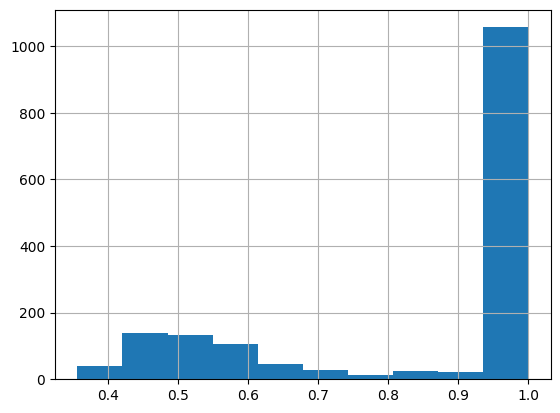

In [24]:
df_title['max_ratio'].hist()

## Example of ratios up 80%

In [25]:
df_title_up80 = df_title[df_title['max_ratio']>0.8]
print(len(df_title_up80))
df_title_up80

1105


,ss_id,ss_title,max_bibkey,max_bib_title,max_ratio,up80_bibkeys,up80_bib_titles,up80_ratios
0,0023c0af3833ba26698ff22e236f3625f1533e86,Quantitative Dose Dependency Analysis of Whole...,Mann16,Quantitative Dose Dependency Analysis of Whole...,0.993197,NaN,NaN,NaN
2,00559146cc1276c6c98401e2aa35e591ebccca76,Model-based segmentation of abdominal aortic a...,Brui03b,Model-based segmentation of abdominal aortic a...,1.000000,"['Brui02', 'Brui03a', 'Brui03b', 'Brui04']",['Active shape model based segmentation of abd...,"[0.8993288590604027, 0.8243243243243243, 1.0, ..."
3,0060644239845c59813a5a9122d34e1f75d18e4c,Association between the number and size of int...,Schr20,Association between the number and size of int...,1.000000,NaN,NaN,NaN
8,0081e840aeaaa405c804371a3768db33d86bab0e,Coronary artery calcification scoring in low-d...,Jaco10a,Coronary artery calcification scoring in low-d...,0.995349,NaN,NaN,NaN
12,010f33ceac3fb9aae25cb7ef51ba0f0dda95bb24,Predicting all-cause and lung cancer mortality...,Schr19,Predicting all-cause and lung cancer mortality...,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2163,fed7c0d369d8991f6b76a661dedd0d1768a402d2,Neural Image Compression for Gigapixel Histopa...,Tell21,Neural Image Compression for Gigapixel Histopa...,0.992701,NaN,NaN,NaN
2166,ff84e1c5bae04497d875a331da0120f8a337d226,Multiplanar Reconstructions of 3D Automated Br...,Zels15,Multiplanar reconstructions of 3D automated br...,0.995392,NaN,NaN,NaN
2168,ffa308f1ec81d2c2e1e75103af34ba450c33ee25,Mini Review: The Last Mile—Opportunities and C...,Turn21,Mini Review: The Last Mile-Opportunities and C...,0.986301,NaN,NaN,NaN
2169,ffa6b97fd94b3641ddf22af707719a42ee4db9ac,Cerebral Artery and Vein Segmentation in Four-...,Meij20b,Cerebral Artery and Vein Segmentation in Fourd...,0.990741,NaN,NaN,NaN


# FILL DF_MATCHES WITH MATCHES ABOVE 80% and single match

#### pd.isna(df_title_up80['up80_bibkeys'])

#### This means that there is only a single bibkey match for this ss_id. This can still mean there are multiple ss_ids that are linked to this bibkey. Also it could be that from these doubles, one has already been linked by doi...

In [26]:
df_title_up80 = df_title[df_title['max_ratio']>0.80]
df_title_up80_single_bib = df_title_up80[pd.isna(df_title_up80['up80_bibkeys'])]
df_title_up80_multiple_bib = df_title_up80[pd.notna(df_title_up80['up80_bibkeys'])]

df_title_up80_single_bib_merge_prep = df_title_up80_single_bib[['max_bibkey', 'ss_id']].copy()

df_title_up80_single_bib_merge_prep.columns = ['bibkey', 'ss_id']
df_title_up80_single_bib_merge_prep['comment']=[None]*len(df_title_up80_single_bib_merge_prep)
df_title_up80_single_bib_merge_prep.head()

,bibkey,ss_id,comment
0,Mann16,0023c0af3833ba26698ff22e236f3625f1533e86,None
3,Schr20,0060644239845c59813a5a9122d34e1f75d18e4c,None
8,Jaco10a,0081e840aeaaa405c804371a3768db33d86bab0e,None
12,Schr19,010f33ceac3fb9aae25cb7ef51ba0f0dda95bb24,None
15,Kart21a,014718afc12c16c0a80091c389bc661933484793,None


In [27]:
df_title_up80_single_bib_merge_prep

,bibkey,ss_id,comment
0,Mann16,0023c0af3833ba26698ff22e236f3625f1533e86,None
3,Schr20,0060644239845c59813a5a9122d34e1f75d18e4c,None
8,Jaco10a,0081e840aeaaa405c804371a3768db33d86bab0e,None
12,Schr19,010f33ceac3fb9aae25cb7ef51ba0f0dda95bb24,None
15,Kart21a,014718afc12c16c0a80091c389bc661933484793,None
...,...,...,...
2163,Tell21,fed7c0d369d8991f6b76a661dedd0d1768a402d2,None
2166,Zels15,ff84e1c5bae04497d875a331da0120f8a337d226,None
2168,Turn21,ffa308f1ec81d2c2e1e75103af34ba450c33ee25,None
2169,Meij20b,ffa6b97fd94b3641ddf22af707719a42ee4db9ac,None


# Seperatly save many bib to one/many cases

In [28]:
df_title_up80_multiple_bib.sort_values('max_bibkey').to_csv('script_data/TEMP_LOOKUP_multiple_bibkeys_maybe_multiple_ss_ids.csv', index=False)

In [29]:
ss_id_counts = Counter(df_title_up80_single_bib_merge_prep['ss_id'])
bibkey_counts = Counter(df_title_up80_single_bib_merge_prep['bibkey'])

In [30]:
doi_matched_bibkeys = df_matches[df_matches['ss_id'].notna()]['bibkey']
single_bibkey_single_ss_id = [k for k, v in bibkey_counts.items() if v==1]
single_bibkey_single_ss_id = [bibkey for bibkey in single_bibkey_single_ss_id if bibkey not in doi_matched_bibkeys]
single_bibkey_single_ss_id_doi_matched = [bibkey for bibkey in single_bibkey_single_ss_id if bibkey in doi_matched_bibkeys]
single_bibkey_multiple_ss_ids = [k for k, v in bibkey_counts.items() if v>1]
single_bibkey_multiple_ss_ids = [bibkey for bibkey in single_bibkey_multiple_ss_ids if bibkey not in doi_matched_bibkeys]
single_bibkey_multiple_ss_ids_doi_matched = [bibkey for bibkey in single_bibkey_multiple_ss_ids if bibkey in doi_matched_bibkeys]

In [31]:
for i in [single_bibkey_single_ss_id, single_bibkey_single_ss_id_doi_matched, single_bibkey_multiple_ss_ids, single_bibkey_multiple_ss_ids_doi_matched]:
    print(len(i))

874
0
62
0


# Add 1 to 1 matches

In [32]:
df_title_up80_single_bib_single_ss_id_merge_prep = df_title_up80_single_bib_merge_prep[df_title_up80_single_bib_merge_prep['bibkey'].isin(single_bibkey_single_ss_id)]
df_title_up80_single_bib_single_ss_id_merge_prep['all_ss_ids'] = [None] * len(df_title_up80_single_bib_single_ss_id_merge_prep)
df_title_up80_single_bib_single_ss_id_merge_prep['comment'] = ['title matching: single bibkey, single ss_id'] * len(df_title_up80_single_bib_single_ss_id_merge_prep)
df_title_up80_single_bib_single_ss_id_merge_prep = df_title_up80_single_bib_single_ss_id_merge_prep[['bibkey', 'ss_id', 'all_ss_ids', 'comment']]

C:\Users\joeyspronck\AppData\Local\Temp\ipykernel_8\3965615019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_up80_single_bib_single_ss_id_merge_prep['all_ss_ids'] = [None] * len(df_title_up80_single_bib_single_ss_id_merge_prep)
C:\Users\joeyspronck\AppData\Local\Temp\ipykernel_8\3965615019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_up80_single_bib_single_ss_id_merge_prep['comment'] = ['title matching: single bibkey, single ss_id'] * len(df_title_up80_single_bib_single_ss_id_

In [33]:
matched_bibkeys = df_matches[df_matches['ss_id'].notna()]['bibkey']

In [34]:
# list(df_title_up80_single_bib_single_ss_id_merge_prep['bibkey'])

In [35]:
df_title_up80_single_bib_single_ss_id_merge_prep

,bibkey,ss_id,all_ss_ids,comment
0,Mann16,0023c0af3833ba26698ff22e236f3625f1533e86,None,"title matching: single bibkey, single ss_id"
3,Schr20,0060644239845c59813a5a9122d34e1f75d18e4c,None,"title matching: single bibkey, single ss_id"
8,Jaco10a,0081e840aeaaa405c804371a3768db33d86bab0e,None,"title matching: single bibkey, single ss_id"
12,Schr19,010f33ceac3fb9aae25cb7ef51ba0f0dda95bb24,None,"title matching: single bibkey, single ss_id"
15,Kart21a,014718afc12c16c0a80091c389bc661933484793,None,"title matching: single bibkey, single ss_id"
...,...,...,...,...
2163,Tell21,fed7c0d369d8991f6b76a661dedd0d1768a402d2,None,"title matching: single bibkey, single ss_id"
2166,Zels15,ff84e1c5bae04497d875a331da0120f8a337d226,None,"title matching: single bibkey, single ss_id"
2168,Turn21,ffa308f1ec81d2c2e1e75103af34ba450c33ee25,None,"title matching: single bibkey, single ss_id"
2169,Meij20b,ffa6b97fd94b3641ddf22af707719a42ee4db9ac,None,"title matching: single bibkey, single ss_id"


In [36]:
df_matches.iloc[df_matches['bibkey'].isin(df_title_up80_single_bib_single_ss_id_merge_prep['bibkey'])] = df_title_up80_single_bib_single_ss_id_merge_prep

# Add single bib to multiple ss_id matches

In [37]:
# df_title_up80_single_bib_multiple_ss_id_merge_prep = df_title_up80_single_bib_merge_prep[df_title_up80_single_bib_merge_prep['bibkey'].isin(single_bibkey_multiple_ss_ids)]
# df_title_up80_single_bib_multiple_ss_id_merge_prep['comment'] = ['single bibkey, multiple ss_id'] * len(df_title_up80_single_bib_multiple_ss_id_merge_prep)

In [38]:
# df_title_up80_single_bib_multiple_ss_id_merge_prep.sort_values('bibkey')

In [39]:
single_bib_multiple_ss_ids_data = []
for bibkey in single_bibkey_multiple_ss_ids:
    multiple_ss_ids = list(df_title_up80_single_bib_merge_prep[df_title_up80_single_bib_merge_prep['bibkey'] == bibkey]['ss_id'])
    ss_id_most_citations = df_ss[df_ss['ss_id'].isin(multiple_ss_ids)].sort_values('ss_citations', ascending=False).iloc[0]['ss_id']
    single_bib_multiple_ss_ids_data.append([bibkey, ss_id_most_citations, multiple_ss_ids, f'title matching: single bibkey with multiple_ss_ids ({multiple_ss_ids}), took the first one with most citations'])
df_title_up80_single_bib_multiple_ss_id_merge_prep = pd.DataFrame(single_bib_multiple_ss_ids_data, columns=['bibkey', 'ss_id', 'all_ss_ids', 'comment'])

In [40]:
df_matches.iloc[df_matches['bibkey'].isin(df_title_up80_single_bib_multiple_ss_id_merge_prep['bibkey'])] = df_title_up80_single_bib_multiple_ss_id_merge_prep

In [41]:
df_matches = pd.merge(df_bib[df_bib['type']!='string'][['bibkey', 'type', 'title', 'authors']], df_matches, on='bibkey')

In [42]:
df_matches

,bibkey,type,title,authors,ss_id,all_ss_ids,comment
0,Abas05,article,Analysis of regularity in the {EEG} background...,D. Ab\'{a}solo and R. Hornero and P. Espino an...,NaN,NaN,NaN
1,Genu22,conference,Imaging tumor-infiltrating CD8 (+) T-cells in ...,E. A. J. van Genugten and B. Piet and G. Schre...,NaN,NaN,NaN
2,Abas05a,inproceedings,EEG} background activity analysis in {A}lzheim...,D. Ab\'{a}solo and C. G\'{o}mez and J. Poza an...,NaN,NaN,NaN
3,Abel19,article,"Computational pathology definitions, best prac...","Abels, Esther and Pantanowitz, Liron and Aeffn...",NaN,NaN,NaN
4,Abra08a,article,Evaluation of a system for automatic detection...,M. D. Abr\`amoff and M. Niemeijer and M. S. A....,0445a1a0aa30c9ca41a8ab31463d617b849a0814,None,"title matching: single bibkey, single ss_id"
...,...,...,...,...,...,...,...
1739,Jark22,article,Generalization of Deep Learning in Digital Pat...,"Jarkman, Sofia and Karlberg, Micael and Pocevi...",c90825e6da28cd71598d38dacf09cd1023ad1a74,None,"title matching: single bibkey, single ss_id"
1740,Vend23,inproceedings,Automatic quantification of {TSR} as a prognos...,"Vendittelli, Pierpaolo and Bokhorst, John-Mell...",NaN,NaN,NaN
1741,Pate23,phdthesis,Automated Image Analysis of Cranial Non-Contra...,Ajay Patel,NaN,NaN,NaN
1742,Loma23a,conference,Deep learning for multi-class cell detection i...,Robin Lomans and Jeroen van der Laak and Iris ...,NaN,NaN,NaN


In [58]:
df_matches_export = df_matches[~df_matches['type'].isin(['conference', 'book', 'inbook', 'mastersthesis', 'phdthesis', 'patent', 'misc'])]

In [59]:
df_matches_export = df_matches_export[~df_matches_export['comment'].isin(['title matching: single bibkey, single ss_id', 'single doi match'])]

In [60]:
df_matches_export

,bibkey,type,title,authors,ss_id,all_ss_ids,comment
0,Abas05,article,Analysis of regularity in the {EEG} background...,D. Ab\'{a}solo and R. Hornero and P. Espino an...,NaN,NaN,NaN
2,Abas05a,inproceedings,EEG} background activity analysis in {A}lzheim...,D. Ab\'{a}solo and C. G\'{o}mez and J. Poza an...,NaN,NaN,NaN
3,Abel19,article,"Computational pathology definitions, best prac...","Abels, Esther and Pantanowitz, Liron and Aeffn...",NaN,NaN,NaN
5,Adri09,article,Fatty foci in the myocardium in patients with ...,Miraude E A P M Adriaensen and Cornelia M Scha...,NaN,NaN,NaN
6,Adri09a,article,Prevalence of subependymal giant cell tumors i...,M. E A P M Adriaensen and C. M. Schaefer-Proko...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1720,Graa23,article,MRI image features with an evident relation to...,"van der Graaf, Jasper W and Kroeze, Robert Jan...",NaN,NaN,NaN
1722,Alves22c,inproceedings,Uncertainty-Guided Self-learning Framework for...,"Alves, Nat{\'a}lia and de Wilde, Bram",NaN,NaN,NaN
1725,Bosma23a,inproceedings,Reproducibility of Training Deep Learning Mode...,Joeran Bosma and Dr{\'e} Peeters and Nat{\'a}l...,NaN,NaN,NaN
1732,Spro23,inproceedings,nnUNet meets pathology: bridging the gap for a...,Joey Spronck and Thijs Gelton and Leander van ...,NaN,NaN,NaN


In [50]:
len(df_matches[df_matches['all_ss_ids'].notna()])

65

In [53]:
df_matches[df_matches['ss_id'].isna()]

,bibkey,type,title,authors,ss_id,all_ss_ids,comment
0,Abas05,article,Analysis of regularity in the {EEG} background...,D. Ab\'{a}solo and R. Hornero and P. Espino an...,NaN,NaN,NaN
1,Genu22,conference,Imaging tumor-infiltrating CD8 (+) T-cells in ...,E. A. J. van Genugten and B. Piet and G. Schre...,NaN,NaN,NaN
2,Abas05a,inproceedings,EEG} background activity analysis in {A}lzheim...,D. Ab\'{a}solo and C. G\'{o}mez and J. Poza an...,NaN,NaN,NaN
3,Abel19,article,"Computational pathology definitions, best prac...","Abels, Esther and Pantanowitz, Liron and Aeffn...",NaN,NaN,NaN
5,Adri09,article,Fatty foci in the myocardium in patients with ...,Miraude E A P M Adriaensen and Cornelia M Scha...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1732,Spro23,inproceedings,nnUNet meets pathology: bridging the gap for a...,Joey Spronck and Thijs Gelton and Leander van ...,NaN,NaN,NaN
1740,Vend23,inproceedings,Automatic quantification of {TSR} as a prognos...,"Vendittelli, Pierpaolo and Bokhorst, John-Mell...",NaN,NaN,NaN
1741,Pate23,phdthesis,Automated Image Analysis of Cranial Non-Contra...,Ajay Patel,NaN,NaN,NaN
1742,Loma23a,conference,Deep learning for multi-class cell detection i...,Robin Lomans and Jeroen van der Laak and Iris ...,NaN,NaN,NaN


In [45]:
df_matches.to_csv('script_data/TEMP_LOOKUP_matches_single_bibkey_with_none_one_or_many_ss_ids.csv')

In [46]:
df_matches.to_excel('script_data/TEMP_LOOKUP_matches_single_bibkey_with_none_one_or_many_ss_ids.xlsx')

In [47]:
df_bib

,bibkey,type,title,authors,doi,gs_citations,journal
0,AA,string,NaN,NaN,NaN,NaN,NaN
1,AAC,string,NaN,NaN,NaN,NaN,NaN
2,AACC,string,NaN,NaN,NaN,NaN,NaN
3,AAPM,string,NaN,NaN,NaN,NaN,NaN
4,AATC,string,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2808,Jark22,article,Generalization of Deep Learning in Digital Pat...,"Jarkman, Sofia and Karlberg, Micael and Pocevi...",10.3390/cancers14215424,NaN,CANCERS
2809,Vend23,inproceedings,Automatic quantification of {TSR} as a prognos...,"Vendittelli, Pierpaolo and Bokhorst, John-Mell...",NaN,NaN,NaN
2810,Pate23,phdthesis,Automated Image Analysis of Cranial Non-Contra...,Ajay Patel,NaN,NaN,PhD thesis
2811,Loma23a,conference,Deep learning for multi-class cell detection i...,Robin Lomans and Jeroen van der Laak and Iris ...,NaN,NaN,NaN


In [48]:
1/0

ZeroDivisionError: division by zero

# OLD

In [ ]:
multiple_ss_ids

In [ ]:
df_ss[df_ss['ss_id'].isin(multiple_ss_ids)].sort_values('ss_citations', ascending=False).iloc[0]['ss_id']

In [ ]:
single_bib_multiple_ss_ids_data

In [ ]:
list(df_title_up80_single_bib_merge_prep[df_title_up80_single_bib_merge_prep['bibkey'] == bibkey]['ss_id'])

In [ ]:
1/0

In [ ]:
df_matches.iloc[df_matches['bibkey'].isin(df_df_title_up80_single_merge_prep['bibkey'])] = df_df_title_up80_single_merge_prep

In [ ]:
bibkeys_single_title_match = [k for k, v in bibkey_counts.items() if v==1]

In [ ]:
df_df_title_up80_single_merge_prep[df_df_title_up80_single_merge_prep['bibkey']=='Altu20']

In [ ]:
df_matches[df_matches['bibkey']=='Altu20']

In [ ]:
df_matches.loc[df_matches['bibkey'].isin(df_df_title_up80_single_merge_prep['bibkey'])]

In [ ]:
df_df_title_up80_single_merge_prep

In [ ]:
df_matches.iloc[df_matches['bibkey'].isin(df_df_title_up80_single_merge_prep['bibkey'])] = df_df_title_up80_single_merge_prep

### With multiple matches above 80%

In [ ]:
df_title_up80_mult = df_title_up80[df_title_up80['up80_ratios'].notna()]
print(len(df_title_up80_mult))
df_title_up80_mult.head()

### Example with same name matches

In [ ]:
bibkey = 'Anto21'
df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]

In [ ]:
temp_ss_ids = list(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]['ss_id'])
temp_ss_ids

In [ ]:
for temp_ss_id in temp_ss_ids:
    display(df_ss[df_ss['ss_id']==temp_ss_id])
    print(df_ss[df_ss['ss_id']==temp_ss_id].iloc[0]['ss_citations'])

In [ ]:
title_match_bibkeys = literal_eval(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey].iloc[0]['up80_bibkeys'])
title_match_bibkeys

In [ ]:
df_bib[df_bib['bibkey'].isin(title_match_bibkeys)]

Above we see one is arxiv and one is journal

### Example with different matches

In [ ]:
bibkey = 'Vos12a'

In [ ]:
literal_eval(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]['up80_bibkeys'].item())

In [ ]:
literal_eval(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]['up80_bib_titles'].item())

In [ ]:
literal_eval(df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]['up80_ratios'].item())

# Loop over cases with multiple matche ratios over 80% 

In [ ]:
def flatten(nested_list):
    return [item for sublist in nested_list for item in (flatten(sublist) if isinstance(sublist, list) else [sublist])]

In [ ]:
for idx, row in df_title_up80_mult.iterrows():
    bibkey = row['max_bibkey']
    bibkey_matches = df_title_up80_mult[df_title_up80_mult['max_bibkey']==bibkey]
    display(bibkey_matches)
    unique_bibkeys = pd.unique(flatten([literal_eval(items) for items in bibkey_matches['up80_bibkeys']]))
    unique_ss_ids = list(bibkey_matches['ss_id'])
    
    print('SS_IDs:')
    for ss_id in unique_ss_ids:
        print('\t\t\t', ss_id)
        print('\n', df_ss[df_ss['ss_id'] == ss_id].iloc[0])
    
    print('\n\nBIBKEYs:')
    for bibkey in unique_bibkeys:
        print('\t\t\t', bibkey)
        print('\n', df_bib[df_bib['bibkey'] == bibkey].iloc[0])

# Validate matches

In [ ]:
# df_bib
# df_ss
# df_doi
# df_title

In [ ]:
len(df_bib)

In [ ]:
df_unmatched = df_bib.copy()
df_unmatched = df_unmatched[~df_unmatched['bibkey'].isin(df_doi['bibkey'])]

In [ ]:
len(df_doi)

In [ ]:
len(df_bib) - len(df_unmatched)